<a href="https://colab.research.google.com/github/Raivotar/pokedex/blob/main/Notebooks/pokedex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
URL = 'https://raw.githubusercontent.com/Raivotar/pokedex/main/Dados/pokedex.csv'
data = pd.read_csv(URL)
data = data.set_index("#")
data = data.loc[~data["Name"].str.contains("Mega")]

In [3]:
def plotar_radar(n):
  cols =  ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

  fig = plt.figure()
  ax = fig.add_subplot(111, polar=True)

  legends = []
  comparar = n

  for i in comparar:
    pokes = data.loc[i, cols].values
    angles=np.linspace(0, 2*np.pi, len(cols), endpoint=False)
    stats=np.concatenate((pokes,[pokes[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    
    ax.plot(angles, stats, "o-")
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, cols)
    legends.append(data.loc[i, "Name"])

  plt.title(" / ".join(legends))
  plt.legend(legends, bbox_to_anchor=(1.05, 1), borderaxespad=0, fontsize=15, ncol=1)
  plt.show()

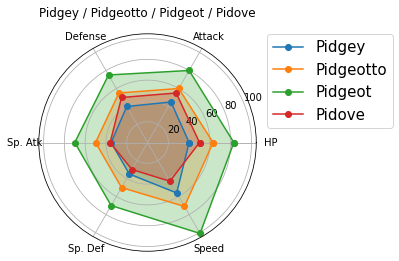

In [4]:
import re
regex = data.loc[data["Name"].str.contains('^pid[a-z]*', flags=re.I, regex=True)]
plotar_radar(regex.index)

In [34]:
legend = data[(data["Legendary"] == True)].sort_values("Generation")
legend1 = data[(data["Legendary"] == True) & (data["Generation"] == 1)].sort_values("Total")
legend2 = data[(data["Legendary"] == True) & (data["Generation"] == 2)].sort_values("Total")
legend3 = data[(data["Legendary"] == True) & (data["Generation"] == 3)].sort_values("Total")
legend4 = data[(data["Legendary"] == True) & (data["Generation"] == 4)].sort_values("Total")



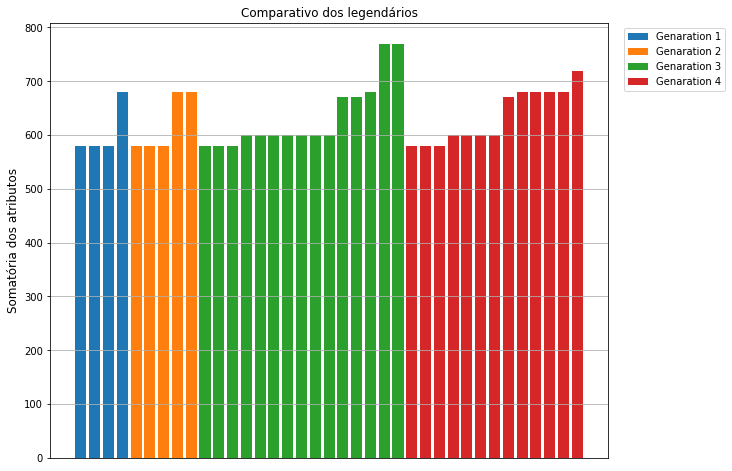

In [40]:
plt.figure(figsize=(10, 8))
plt.bar(legend1["Name"], legend1["Total"], label="Genaration 1")
plt.bar(legend2["Name"], legend2["Total"], label="Genaration 2")
plt.bar(legend3["Name"], legend3["Total"], label="Genaration 3")
plt.bar(legend4["Name"], legend4["Total"], label="Genaration 4")
plt.legend(bbox_to_anchor=(1.02, 1))
plt.title("Comparativo dos legendários", size=12)
plt.ylabel("Somatória dos atributos", size=12)
plt.xticks([])
plt.grid()
plt.show()